In [1]:
import pandas as pd
import numpy as np
import pyarrow
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lars, LarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import plotly.express as px
from sklearn.feature_selection import RFE, SelectKBest, f_regression, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
import math
from scipy import stats
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from numpy import mean, std
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import pearsonr
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense

2025-08-08 22:51:16.608845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-08 22:51:16.616516: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-08 22:51:16.637417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754680876.670641   17062 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754680876.681210   17062 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754680876.706258   17062 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
monthly_dataset = pd.read_parquet("/mnt/e/flux_ET_dataset/terra_climate/edited_monthly/monthly_dataset_3sep.parquet", engine='pyarrow')

budyko_4model = pd.read_csv("/mnt/e/Term2/WERI/ML_Budyko/3- result/Budyko_curve/4Models_budyko/result_4models_estimation.csv")

In [3]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

X = monthly_dataset.drop(['ET_fill',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'pet',
                          'delta_s',
                          'def'], axis =1)

y = monthly_dataset['ET_fill']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [4]:
x_train_new = X_train.reset_index()
X_test_new = X_test.reset_index()
y_train_new = y_train.reset_index()
y_test_new = y_test.reset_index()

df_y_train_with_date = pd.merge(
    y_train_new,
    x_train_new[['index', 'Year', 'Month']],
    on='index',
    how='left'
)
df_y_test_with_date = pd.merge(
    y_test_new,
    X_test_new[['index', 'Year', 'Month']],
    on='index',
    how='left'
)

In [5]:
def calculate_metrics(actual, predicted):

    actual = actual
    predicted = predicted

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    mbe = np.mean(predicted - actual)  # Mean Bias Error

    return rmse, nse, nrmse, r2, r, std, mbe

In [6]:
best_model_xgb = XGBRegressor(
    n_estimators= 100,
    max_depth= 3,
    learning_rate= 0.1,
    gamma= 0.2,
    subsample= 1.0,
    colsample_bytree= 1.0)


selector_xgb = RFE(estimator=best_model_xgb, n_features_to_select = 7)
selector_xgb.fit(X_train, y_train)

selected_features_xgb = X.columns[selector_xgb.support_]

y_train_pred_xgb = selector_xgb.predict(X_train)
y_test_pred_xgb = selector_xgb.predict(X_test)

In [7]:
df_train_xgb7 = pd.DataFrame({
    'y_train': y_train,
    'y_train_pred_xgb': y_train_pred_xgb
})

df_train_xgb7_new = df_train_xgb7.reset_index()

df_test_xgb7 = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred_xgb': y_test_pred_xgb
})

df_test_xgb7_new = df_test_xgb7.reset_index()

df_y_train_with_date_predicted_xgb7 = pd.merge(
    df_y_train_with_date,
    df_train_xgb7_new[['index', 'y_train_pred_xgb']],
    on='index',
    how='left'
)
df_y_test_with_date_predicted_xgb7 = pd.merge(
    df_y_test_with_date,
    df_test_xgb7_new[['index', 'y_test_pred_xgb']],
    on='index',
    how='left'
)

In [8]:
df_y_train_with_date_predicted_xgb7['level'] = 'train'
df_y_test_with_date_predicted_xgb7['level'] = 'test'

df_y_train_with_date_predicted_xgb7 = df_y_train_with_date_predicted_xgb7.rename({'y_train_pred_xgb': 'y'}, axis=1)
df_y_test_with_date_predicted_xgb7 = df_y_test_with_date_predicted_xgb7.rename({'y_test_pred_xgb': 'y'}, axis=1)

df_combined = pd.concat([df_y_train_with_date_predicted_xgb7, df_y_test_with_date_predicted_xgb7], ignore_index=False)

In [9]:
df_combined

,index,ET_fill,Year,Month,y,level
0,111,7.150572,2015,4,7.532485,train
1,247,5.450234,2018,2,7.320244,train
2,233,19.966718,2018,12,16.371746,train
3,87,5.828626,2019,4,7.446656,train
4,76,0.567425,2017,12,0.744417,train
...,...,...,...,...,...,...
94,70,42.192979,2019,5,20.754387,test
95,5,9.984581,2017,3,23.311583,test
96,127,12.724686,2017,3,7.262719,test
97,241,17.308571,2019,11,12.233812,test


In [10]:
budyko_4model

,Unnamed: 0,Year,Month,ET_fill,ppt,eto_hargreaves,aet,def,pr,pet,...,delta,pr_delta,ratio_budyko_hargreaves_Fu,aet_budyko_Fu,ratio_budyko_hargreaves_Turc-pike,aet_budyko_Turc-pike,ratio_budyko_hargreaves_Zhang,aet_budyko_Zhang,ratio_budyko_hargreaves_wang-Tang,aet_budyko_wang-Tang
0,0,2009,4,8.290689,22.100,7.429282,19.00,110.30,11.0,131.6,...,-5.5,27.600,0.245079,6.764175,0.245016,6.762429,0.229248,6.327255,0.245103,6.764857
1,1,2009,5,6.472561,17.600,11.523211,12.40,168.65,10.0,186.9,...,-3.5,21.100,0.435976,9.199096,0.430879,9.091537,0.398475,8.407825,0.440929,9.303597
2,2,2009,6,5.417223,9.500,3.296496,7.30,190.80,5.0,201.1,...,-2.6,12.100,0.247696,2.997126,0.247598,2.995935,0.231588,2.802209,0.247754,2.997825
3,4,2009,9,8.310515,1.600,5.217145,4.20,155.10,2.0,159.7,...,-1.2,2.800,0.802100,2.245879,0.792971,2.220318,0.762879,2.136061,0.810952,2.270667
4,5,2009,10,9.522431,4.300,12.645993,37.15,56.30,38.0,95.2,...,-1.0,5.300,0.849876,4.504340,0.844021,4.473313,0.821632,4.354647,0.855395,4.533591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,108,2020,3,17.210329,51.816,20.320406,51.70,34.20,41.0,86.1,...,-5.9,57.716,0.308840,17.825036,0.307623,17.754764,0.285928,16.502625,0.309959,17.889578
98,109,2020,4,8.070300,38.800,11.013723,47.80,90.60,35.0,134.7,...,-8.9,47.700,0.213681,10.192604,0.213959,10.205830,0.201079,9.591451,0.213385,10.178483
99,110,2020,5,3.088043,4.100,5.001569,12.00,182.00,7.0,194.0,...,-4.9,9.000,0.441505,3.973547,0.436207,3.925861,0.403404,3.630635,0.446663,4.019964
100,114,2020,11,1.573960,12.319,4.425902,12.00,43.20,12.0,55.4,...,-1.2,13.519,0.290454,3.926652,0.289632,3.915541,0.269638,3.645236,0.291196,3.936672


In [11]:
df_Budyko_xgb7 = pd.merge(
    df_combined,
    budyko_4model[['Year', 'Month','aet_budyko_Fu','aet_budyko_Zhang', 'aet_budyko_Turc-pike','aet_budyko_wang-Tang']],
    on=['Year', 'Month'],
    how='left'
)
df_Budyko_xgb7

,index,ET_fill,Year,Month,y,level,aet_budyko_Fu,aet_budyko_Zhang,aet_budyko_Turc-pike,aet_budyko_wang-Tang
0,111,7.150572,2015,4,7.532485,train,9.208400,8.546821,9.181660,9.232556
1,247,5.450234,2018,2,7.320244,train,4.110575,3.750900,4.054517,4.165685
2,233,19.966718,2018,12,16.371746,train,8.934772,8.359545,8.933057,8.935110
3,87,5.828626,2019,4,7.446656,train,9.938586,9.412252,9.963996,9.912631
4,76,0.567425,2017,12,0.744417,train,1.721962,1.576199,1.704077,1.739202
...,...,...,...,...,...,...,...,...,...,...
322,70,42.192979,2019,5,20.754387,test,20.761753,19.233039,20.685224,20.831805
323,5,9.984581,2017,3,23.311583,test,12.484376,11.851688,12.520975,12.447084
324,127,12.724686,2017,3,7.262719,test,12.484376,11.851688,12.520975,12.447084
325,241,17.308571,2019,11,12.233812,test,7.512697,7.117104,7.419433,7.603705


In [12]:
monthly_means_Fu = df_Budyko_xgb7.groupby('Month')['aet_budyko_Fu'].mean()
monthly_means_Zhang = df_Budyko_xgb7.groupby('Month')['aet_budyko_Zhang'].mean()
monthly_means_Turc_pike = df_Budyko_xgb7.groupby('Month')['aet_budyko_Turc-pike'].mean()
monthly_means_wang_Tang = df_Budyko_xgb7.groupby('Month')['aet_budyko_wang-Tang'].mean()

In [13]:
def fill_missing_with_month_avg_general(row, col_name, monthly_means):
    if pd.isna(row[col_name]):
        return monthly_means.loc[row['Month']]
    else:
        return row[col_name]

In [14]:
for col in ['aet_budyko_Zhang', 'aet_budyko_Fu', 'aet_budyko_Turc-pike', 'aet_budyko_wang-Tang']:  # فقط مثال
    monthly_means = df_Budyko_xgb7.groupby('Month')[col].mean()
    df_Budyko_xgb7[col] = df_Budyko_xgb7.apply(
        lambda row: fill_missing_with_month_avg_general(row, col, monthly_means),
        axis=1
    )

In [15]:

df_Budyko_xgb7 = df_Budyko_xgb7.sort_values(by=['Year', 'Month']).reset_index(drop=True)


df_Budyko_xgb7['aet_Fu_3mo_avg'] = df_Budyko_xgb7['aet_budyko_Fu'].shift(1).rolling(window=3).mean()

df_Budyko_xgb7['aet_budyko_Fu'] = df_Budyko_xgb7['aet_budyko_Fu'].fillna(
    df_Budyko_xgb7['aet_Fu_3mo_avg']
)

df_Budyko_xgb7['aet_Zhang_3mo_avg'] = df_Budyko_xgb7['aet_budyko_Zhang'].shift(1).rolling(window=3).mean()

df_Budyko_xgb7['aet_budyko_Zhang'] = df_Budyko_xgb7['aet_budyko_Zhang'].fillna(
    df_Budyko_xgb7['aet_Zhang_3mo_avg']
)


df_Budyko_xgb7['aet_Turc-pike_3mo_avg'] = df_Budyko_xgb7['aet_budyko_Turc-pike'].shift(1).rolling(window=3).mean()

df_Budyko_xgb7['aet_budyko_Turc-pike'] = df_Budyko_xgb7['aet_budyko_Turc-pike'].fillna(
    df_Budyko_xgb7['aet_Turc-pike_3mo_avg']
)

df_Budyko_xgb7['aet_wang-Tang_3mo_avg'] = df_Budyko_xgb7['aet_budyko_wang-Tang'].shift(1).rolling(window=3).mean()

df_Budyko_xgb7['aet_budyko_wang-Tang'] = df_Budyko_xgb7['aet_budyko_wang-Tang'].fillna(
    df_Budyko_xgb7['aet_wang-Tang_3mo_avg']
)
df_Budyko_xgb7

,index,ET_fill,Year,Month,y,level,aet_budyko_Fu,aet_budyko_Zhang,aet_budyko_Turc-pike,aet_budyko_wang-Tang,aet_Fu_3mo_avg,aet_Zhang_3mo_avg,aet_Turc-pike_3mo_avg,aet_wang-Tang_3mo_avg
0,250,8.290689,2009,4,11.576839,train,6.764175,6.327255,6.762429,6.764857,NaN,NaN,NaN,NaN
1,251,6.472561,2009,5,9.083441,train,9.199096,8.407825,9.091537,9.303597,NaN,NaN,NaN,NaN
2,252,5.417223,2009,6,7.070886,train,2.997126,2.802209,2.995935,2.997825,NaN,NaN,NaN,NaN
3,253,6.895155,2009,8,6.750362,train,1.881471,1.822542,1.869564,1.892652,6.320132,5.845763,6.283300,6.355426
4,254,8.310515,2009,9,6.232661,test,2.245879,2.136061,2.220318,2.270667,4.692564,4.344192,4.652345,4.731358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,94,2.822407,2020,10,2.319987,train,5.469235,5.129565,5.450292,5.487242,3.829476,3.549836,3.792732,3.865302
323,95,2.697623,2020,11,4.531267,train,3.926652,3.645236,3.915541,3.936672,4.264115,3.972154,4.232107,4.295278
324,154,0.450296,2020,11,2.613811,test,3.926652,3.645236,3.915541,3.936672,4.184561,3.899696,4.159899,4.208398
325,155,1.062534,2020,12,1.641089,train,7.164942,6.655865,7.146497,7.181476,4.440846,4.140013,4.427125,4.453529


In [16]:

df_Budyko_xgb7.isna().sum()

index                    0
ET_fill                  0
Year                     0
Month                    0
y                        0
level                    0
aet_budyko_Fu            0
aet_budyko_Zhang         0
aet_budyko_Turc-pike     0
aet_budyko_wang-Tang     0
aet_Fu_3mo_avg           9
aet_Zhang_3mo_avg        9
aet_Turc-pike_3mo_avg    9
aet_wang-Tang_3mo_avg    9
dtype: int64

In [30]:
# Split the data into training and testing sets
X = df_Budyko_xgb7[['aet_budyko_wang-Tang', 'y']]
y = df_Budyko_xgb7['ET_fill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


# --- Step 2: Build and train the ensemble neural network model ---
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu')) # 2 inputs: Budyko and ML predictions
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear')) # Output layer for regression

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# --- Step 3: Evaluate the ensemble model ---
# Make predictions on the test set
y_pred_ensemble = model.predict(X_test)

# --- Step 4: Evaluate the performance using the provided function ---
# Flatten the arrays to make them 1-dimensional
y_test_flat = y_test.values.flatten()
y_pred_ensemble_flat = y_pred_ensemble.flatten()

# Pass the flattened arrays to your function
rmse, nse, nrmse, r2, r, std, mbe = calculate_metrics(y_test_flat, y_pred_ensemble_flat)

# Evaluate the performance
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
print(f"RMSE of the ensemble model: {rmse_ensemble:.2f}")



/mnt/g/Mehdi_Stuff/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
RMSE of the ensemble model: 3.24


In [31]:
# --- Step 5: Print the evaluation metrics ---
print("Ensemble Model Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"NSE: {nse:.2f}")
print(f"NRMSE: {nrmse:.2f}")
print(f"R2: {r2:.2f}")
print(f"Pearson's R: {r:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"MBE: {mbe:.2f}")

Ensemble Model Metrics:
RMSE: 3.24
NSE: 0.90
NRMSE: 0.06
R2: 0.90
Pearson's R: 0.95
Standard Deviation: 9.05
MBE: 0.22


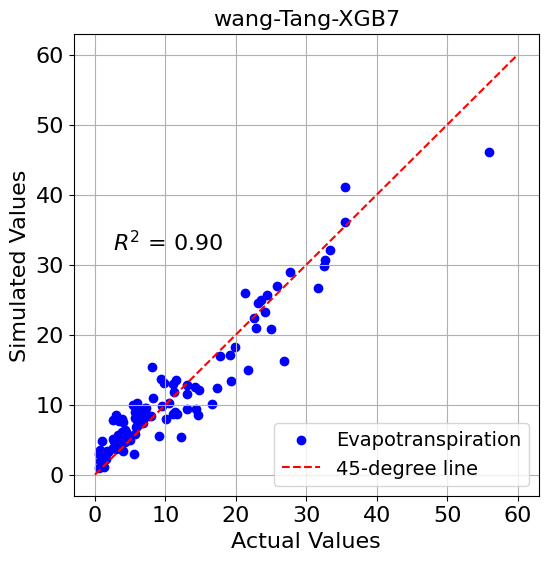

In [32]:
actual = y_test_flat
simulated = y_pred_ensemble_flat

# Calculate R2
r2 = r2

# Plot the actual vs. simulated values
plt.figure(figsize=(6, 6))
plt.scatter(actual, simulated, color='blue', label='Evapotranspiration')

# Plot the 45-degree line
min_val = min(min(actual), min(simulated))
max_val = max(max(actual), max(simulated))
plt.plot([0, 60], [0, 60], 'r--', label='45-degree line')

# Labels and Title
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Simulated Values', fontsize=16)
plt.title('wang-Tang-XGB7', fontsize=16)

# Add R2 value as text on the plot
plt.text(2.5, 32, f'$R^2$ = {r2:.2f}', fontsize=16, color='black')
# 5,55

# Set custom font for tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()
plt.legend(fontsize=14, loc = 'lower right')
plt.savefig('/mnt/e/Term2/WERI/ML_Budyko/3- result/chart/45degree_3Mar/wang-Tang-XGB7_8Aug.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()